<div class="alert alert-block alert-success">
    <b><center>Natual Language Processing</center></b>
    <b><center>Tokenize</center></b>
</div>

# Configure Learning Environment

In [1]:
import nltk
# nltk.download("all")

# Pure Python Tokenize

In [2]:
texts = [
    "He is boy. She is girl. she is beautiful! There are so many girls.",
    "What's up ? bro~~! At eight o'clock on Thursday morning Arthur didn't feel very good."
]

In [3]:
# 기본 단어 분할
print(texts[0].split())

['He', 'is', 'boy.', 'She', 'is', 'girl.', 'she', 'is', 'beautiful!', 'There', 'are', 'so', 'many', 'girls.']


In [4]:
texts[0].split().index("many")

12

In [5]:
# 토큰들 출력
print(set(texts[0].split()))

{'boy.', 'girls.', 'she', 'girl.', 'is', 'beautiful!', 'are', 'She', 'so', 'There', 'many', 'He'}


In [6]:
# 사전 만드는 함수
def getDictionary(texts):
    words = set(texts.split())
    diction = {"OOV": 0}
    for index, item in enumerate(words):
        diction[item] = index + 1
    return diction

In [7]:
mydic = getDictionary(texts[0])
print(mydic)

{'OOV': 0, 'boy.': 1, 'girls.': 2, 'she': 3, 'girl.': 4, 'is': 5, 'beautiful!': 6, 'are': 7, 'She': 8, 'so': 9, 'There': 10, 'many': 11, 'He': 12}


In [8]:
def getTokens(dic, texts):
    texts = texts.split()
    tokens = []
    for item in texts:
        try:
            tokens.append(dic[item])
        except:
            tokens.append(dic["OOV"])
    return tokens

In [9]:
print(getTokens(mydic, "She is cute."), getTokens(mydic, "she is cute."))

[8, 5, 0] [3, 5, 0]


In [10]:
# cleaning
mydic = getDictionary(texts[0].lower())
print(mydic)
print(getTokens(mydic, "She is cute.".lower()), getTokens(mydic, "she is cute.".lower()))

{'OOV': 0, 'boy.': 1, 'there': 2, 'girls.': 3, 'she': 4, 'girl.': 5, 'is': 6, 'beautiful!': 7, 'he': 8, 'so': 9, 'many': 10, 'are': 11}
[4, 6, 0] [4, 6, 0]


# NLTK

In [11]:
from nltk import tokenize, stem, tag, chunk

In [12]:
# 문장 분절
sent = tokenize.sent_tokenize(texts[0])
print(sent)

['He is boy.', 'She is girl.', 'she is beautiful!', 'There are so many girls.']


In [13]:
# 단어 토큰화
tokens = tokenize.word_tokenize(texts[0])
print(tokens)

['He', 'is', 'boy', '.', 'She', 'is', 'girl', '.', 'she', 'is', 'beautiful', '!', 'There', 'are', 'so', 'many', 'girls', '.']


In [14]:
# 품사 태깅
tags = tag.pos_tag(tokens)
print(tags)

[('He', 'PRP'), ('is', 'VBZ'), ('boy', 'JJ'), ('.', '.'), ('She', 'PRP'), ('is', 'VBZ'), ('girl', 'JJ'), ('.', '.'), ('she', 'PRP'), ('is', 'VBZ'), ('beautiful', 'JJ'), ('!', '.'), ('There', 'EX'), ('are', 'VBP'), ('so', 'RB'), ('many', 'JJ'), ('girls', 'NNS'), ('.', '.')]


In [15]:
# named entities : 이름 개체 인식
entities = chunk.ne_chunk(tags)
entities.pprint()

(S
  He/PRP
  is/VBZ
  boy/JJ
  ./.
  She/PRP
  is/VBZ
  girl/JJ
  ./.
  she/PRP
  is/VBZ
  beautiful/JJ
  !/.
  There/EX
  are/VBP
  so/RB
  many/JJ
  girls/NNS
  ./.)


In [16]:
import os
os.system("Xvfb :1 -screen 0 1024x768x16 &")
os.environ['DISPLAY'] = ":1.0"

_XSERVTransmkdir: Owner of /tmp/.X11-unix should be set to root


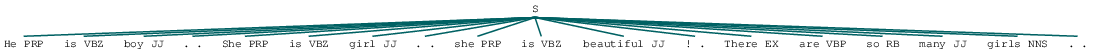

In [17]:
entities

## corpus

In [18]:
from nltk import corpus

In [19]:
# gutenberg 말뭉치 : 저작권이 말소된 문학작품들
corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [20]:
raw_hamlet = corpus.gutenberg.raw("shakespeare-hamlet.txt")
print(raw_hamlet[:100])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo a


In [21]:
sent_hamlet = tokenize.sent_tokenize(raw_hamlet)
print(sent_hamlet[:10])

['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.', 'Enter Barnardo and Francisco two Centinels.', 'Barnardo.', "Who's there?", 'Fran.', 'Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar.', 'Long liue the King\n\n   Fran.', 'Barnardo?', 'Bar.']


## Lemmatizing
표제어(사전 기본형) 추출

In [22]:
from nltk import stem

In [23]:
word_exam = ["do", "doing", "done", "have", "having", "has", "lives", "am", "are", "is"]

In [24]:
lemmer = stem.WordNetLemmatizer()

In [25]:
print(list(map(lemmer.lemmatize, word_exam)))

['do', 'doing', 'done', 'have', 'having', 'ha', 'life', 'am', 'are', 'is']


In [26]:
print([lemmer.lemmatize(item, pos="v") for item in word_exam])

['do', 'do', 'do', 'have', 'have', 'have', 'live', 'be', 'be', 'be']


## Stemming
단어에서 접사(affix)를 제거

In [27]:
stemmer_porter = stem.PorterStemmer()
stemmer_lancaster = stem.LancasterStemmer()

In [28]:
print(list(map(stemmer_porter.stem, word_exam)))

['do', 'do', 'done', 'have', 'have', 'ha', 'live', 'am', 'are', 'is']


In [29]:
print(list(map(stemmer_lancaster.stem, word_exam)))

['do', 'doing', 'don', 'hav', 'hav', 'has', 'liv', 'am', 'ar', 'is']


# Stopword
불용어 : 유믜미한 단어만 토큰으로 사용하기 위함

In [30]:
# nltk에 저장된 영문 불용어 로딩
word_stop = set(corpus.stopwords.words("english"))
print(word_stop, len(word_stop))

{'while', "aren't", 'before', 'if', 'no', 'd', "you've", 'she', 've', 'am', "mustn't", 'same', 'of', "shan't", "you'd", 'this', 'had', 'on', 'who', 'it', 'most', 'under', 'yourself', 'once', 'my', 'and', 'but', "couldn't", 'in', 'below', 'than', 'ourselves', "wasn't", 'so', 'needn', 'for', 'off', 'should', 'isn', 'm', 'him', 'until', 'he', 'these', 'other', 'll', 'which', 'at', 'the', "don't", 'yourselves', 'any', 'further', 'only', "wouldn't", 'do', 'above', 'or', "hadn't", "shouldn't", 'an', 'our', 'won', 'all', 'can', 'your', 'about', 'each', 'just', 'during', 'that', "weren't", 'herself', 'again', 'then', 'why', 'more', 'theirs', 'themselves', 'what', 'a', "you'll", 'few', 'their', 'myself', 'his', 'mustn', 'been', 'how', "hasn't", 'because', "isn't", 'ours', 'those', 'being', 'with', 're', 'doing', 'both', 'weren', "won't", 'be', 'did', 'over', "doesn't", "that'll", 'was', 'shouldn', 'here', 'yours', 'between', "should've", 'nor', "it's", "you're", 'through', 't', 'whom', 's', "sh

In [31]:
word_token = tokenize.word_tokenize(texts[1])
print(word_token)

['What', "'s", 'up', '?', 'bro~~', '!', 'At', 'eight', "o'clock", 'on', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']


In [32]:
# 불용어 필터링
word_filtered = [item for item in word_token if not item in word_stop]
print(word_filtered)

['What', "'s", '?', 'bro~~', '!', 'At', 'eight', "o'clock", 'Thursday', 'morning', 'Arthur', "n't", 'feel', 'good', '.']


In [33]:
# 불용어 추가
word_stop.update(("?", "!", "bro~~"))

In [34]:
# 불용어 필터링
word_filtered = [item for item in word_token if not item in word_stop]
print(word_filtered)

['What', "'s", 'At', 'eight', "o'clock", 'Thursday', 'morning', 'Arthur', "n't", 'feel', 'good', '.']


In [35]:
# 불용어 제거
word_stop.remove("bro~~")

In [36]:
# 불용어 필터링
word_filtered = [item for item in word_token if not item in word_stop]
print(word_filtered)

['What', "'s", 'bro~~', 'At', 'eight', "o'clock", 'Thursday', 'morning', 'Arthur', "n't", 'feel', 'good', '.']


# Number Encoding

## Counter 이용

In [37]:
from collections import Counter

In [38]:
sent_tokens = list(map(tokenize.word_tokenize, sent_hamlet[:30]))
print(sent_tokens)

[['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.'], ['Scoena', 'Prima', '.'], ['Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.'], ['Barnardo', '.'], ['Who', "'s", 'there', '?'], ['Fran', '.'], ['Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe', 'Bar', '.'], ['Long', 'liue', 'the', 'King', 'Fran', '.'], ['Barnardo', '?'], ['Bar', '.'], ['He', 'Fran', '.'], ['You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'Bar', '.'], ["'T", 'is', 'now', 'strook', 'twelue', ',', 'get', 'thee', 'to', 'bed', 'Francisco', 'Fran', '.'], ['For', 'this', 'releefe', 'much', 'thankes', ':', "'T", 'is', 'bitter', 'cold', ',', 'And', 'I', 'am', 'sicke', 'at', 'heart', 'Barn', '.'], ['Haue', 'you', 'had', 'quiet', 'Guard', '?'], ['Fran', '.'], ['Not', 'a', 'Mouse', 'stirring', 'Barn', '.'], ['Well', ',', 'goodnight', '.'], ['If', 'you', 'do', 'meet', 'Horatio', 'and', 'Marcellus', ',', 'the', 'Riuals', 'of', '

In [39]:
# 단어 리스트(1차원) 만들기
sent_words = sum(sent_tokens, [])
print(sent_words)

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'and', 'Francisco', 'two', 'Centinels', '.', 'Barnardo', '.', 'Who', "'s", 'there', '?', 'Fran', '.', 'Nay', 'answer', 'me', ':', 'Stand', '&', 'vnfold', 'your', 'selfe', 'Bar', '.', 'Long', 'liue', 'the', 'King', 'Fran', '.', 'Barnardo', '?', 'Bar', '.', 'He', 'Fran', '.', 'You', 'come', 'most', 'carefully', 'vpon', 'your', 'houre', 'Bar', '.', "'T", 'is', 'now', 'strook', 'twelue', ',', 'get', 'thee', 'to', 'bed', 'Francisco', 'Fran', '.', 'For', 'this', 'releefe', 'much', 'thankes', ':', "'T", 'is', 'bitter', 'cold', ',', 'And', 'I', 'am', 'sicke', 'at', 'heart', 'Barn', '.', 'Haue', 'you', 'had', 'quiet', 'Guard', '?', 'Fran', '.', 'Not', 'a', 'Mouse', 'stirring', 'Barn', '.', 'Well', ',', 'goodnight', '.', 'If', 'you', 'do', 'meet', 'Horatio', 'and', 'Marcellus', ',', 'the', 'Riuals', 'of', 'my', 'Watch', ',', 'bid', 'them', 'ma

In [40]:
# 단어 집합(vocabulary) 만들기
vocab = Counter(sent_words)
print(vocab)

Counter({'.': 25, 'Fran': 7, ',': 6, '?': 5, 'you': 5, 'Barnardo': 4, ':': 4, 'and': 3, "'s": 3, 'Bar': 3, 'the': 3, 'to': 3, 'I': 3, 'of': 2, 'Enter': 2, 'Francisco': 2, 'there': 2, 'Stand': 2, 'your': 2, "'T": 2, 'is': 2, 'this': 2, 'And': 2, 'Barn': 2, 'goodnight': 2, 'Horatio': 2, 'Marcellus': 2, 'my': 2, 'them': 2, 'who': 2, 'Mar': 2, '[': 1, 'The': 1, 'Tragedie': 1, 'Hamlet': 1, 'by': 1, 'William': 1, 'Shakespeare': 1, '1599': 1, ']': 1, 'Actus': 1, 'Primus': 1, 'Scoena': 1, 'Prima': 1, 'two': 1, 'Centinels': 1, 'Who': 1, 'Nay': 1, 'answer': 1, 'me': 1, '&': 1, 'vnfold': 1, 'selfe': 1, 'Long': 1, 'liue': 1, 'King': 1, 'He': 1, 'You': 1, 'come': 1, 'most': 1, 'carefully': 1, 'vpon': 1, 'houre': 1, 'now': 1, 'strook': 1, 'twelue': 1, 'get': 1, 'thee': 1, 'bed': 1, 'For': 1, 'releefe': 1, 'much': 1, 'thankes': 1, 'bitter': 1, 'cold': 1, 'am': 1, 'sicke': 1, 'at': 1, 'heart': 1, 'Haue': 1, 'had': 1, 'quiet': 1, 'Guard': 1, 'Not': 1, 'a': 1, 'Mouse': 1, 'stirring': 1, 'Well': 1, 'If':

In [41]:
print(vocab.most_common(10))

[('.', 25), ('Fran', 7), (',', 6), ('?', 5), ('you', 5), ('Barnardo', 4), (':', 4), ('and', 3), ("'s", 3), ('Bar', 3)]


In [42]:
word_to_num = {"OOV": 0}
num = 1
for word, freq in vocab.most_common():
    if freq > 1 and freq < 25:
        word_to_num[word] = num
        num += 1

In [43]:
print(word_to_num)

{'OOV': 0, 'Fran': 1, ',': 2, '?': 3, 'you': 4, 'Barnardo': 5, ':': 6, 'and': 7, "'s": 8, 'Bar': 9, 'the': 10, 'to': 11, 'I': 12, 'of': 13, 'Enter': 14, 'Francisco': 15, 'there': 16, 'Stand': 17, 'your': 18, "'T": 19, 'is': 20, 'this': 21, 'And': 22, 'Barn': 23, 'goodnight': 24, 'Horatio': 25, 'Marcellus': 26, 'my': 27, 'them': 28, 'who': 29, 'Mar': 30}


In [44]:
# Encoding
sent_tokens_nums = []
for sent in sent_tokens:
    tokens_nums = []
    tokens_len = 0
    for word in sent:
        try:
            tokens_nums.append(word_to_num[word])
            tokens_len += 1
        except:
#             tokens_nums.append(word_to_num["OOV"])
            pass
    if tokens_len > 3 and tokens_len < 10:
        sent_tokens_nums.append(tokens_nums)

In [45]:
sent_tokens_nums

[[14, 5, 7, 15],
 [6, 17, 18, 9],
 [19, 20, 2, 11, 15, 1],
 [21, 6, 19, 20, 2, 22, 12, 23],
 [14, 25, 7, 26],
 [17, 6, 29, 8, 16, 3],
 [22, 11, 10, 1],
 [2, 29, 4, 3],
 [5, 8, 27, 6, 4, 24]]

## NLTK 이용

In [46]:
vocab_nltk = nltk.FreqDist(sent_words)
print(vocab_nltk.most_common())

[('.', 25), ('Fran', 7), (',', 6), ('?', 5), ('you', 5), ('Barnardo', 4), (':', 4), ('and', 3), ("'s", 3), ('Bar', 3), ('the', 3), ('to', 3), ('I', 3), ('of', 2), ('Enter', 2), ('Francisco', 2), ('there', 2), ('Stand', 2), ('your', 2), ("'T", 2), ('is', 2), ('this', 2), ('And', 2), ('Barn', 2), ('goodnight', 2), ('Horatio', 2), ('Marcellus', 2), ('my', 2), ('them', 2), ('who', 2), ('Mar', 2), ('[', 1), ('The', 1), ('Tragedie', 1), ('Hamlet', 1), ('by', 1), ('William', 1), ('Shakespeare', 1), ('1599', 1), (']', 1), ('Actus', 1), ('Primus', 1), ('Scoena', 1), ('Prima', 1), ('two', 1), ('Centinels', 1), ('Who', 1), ('Nay', 1), ('answer', 1), ('me', 1), ('&', 1), ('vnfold', 1), ('selfe', 1), ('Long', 1), ('liue', 1), ('King', 1), ('He', 1), ('You', 1), ('come', 1), ('most', 1), ('carefully', 1), ('vpon', 1), ('houre', 1), ('now', 1), ('strook', 1), ('twelue', 1), ('get', 1), ('thee', 1), ('bed', 1), ('For', 1), ('releefe', 1), ('much', 1), ('thankes', 1), ('bitter', 1), ('cold', 1), ('am',

## Tensorflow 이용

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer

2021-07-18 17:47:29.350738: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [48]:
tokenizer = Tokenizer(num_words=50, oov_token="OOV")
tokenizer.fit_on_texts(sent_tokens)

In [49]:
print(tokenizer.word_index)

{'OOV': 1, '.': 2, 'fran': 3, 'you': 4, ',': 5, 'and': 6, '?': 7, 'the': 8, 'barnardo': 9, ':': 10, 'who': 11, "'s": 12, 'bar': 13, 'to': 14, 'i': 15, 'of': 16, 'enter': 17, 'francisco': 18, 'there': 19, 'stand': 20, 'your': 21, "'t": 22, 'is': 23, 'this': 24, 'barn': 25, 'goodnight': 26, 'horatio': 27, 'marcellus': 28, 'my': 29, 'them': 30, 'mar': 31, 'giue': 32, '[': 33, 'tragedie': 34, 'hamlet': 35, 'by': 36, 'william': 37, 'shakespeare': 38, '1599': 39, ']': 40, 'actus': 41, 'primus': 42, 'scoena': 43, 'prima': 44, 'two': 45, 'centinels': 46, 'nay': 47, 'answer': 48, 'me': 49, '&': 50, 'vnfold': 51, 'selfe': 52, 'long': 53, 'liue': 54, 'king': 55, 'he': 56, 'come': 57, 'most': 58, 'carefully': 59, 'vpon': 60, 'houre': 61, 'now': 62, 'strook': 63, 'twelue': 64, 'get': 65, 'thee': 66, 'bed': 67, 'for': 68, 'releefe': 69, 'much': 70, 'thankes': 71, 'bitter': 72, 'cold': 73, 'am': 74, 'sicke': 75, 'at': 76, 'heart': 77, 'haue': 78, 'had': 79, 'quiet': 80, 'guard': 81, 'not': 82, 'a': 8

In [50]:
print(tokenizer.word_counts)

OrderedDict([('[', 1), ('the', 4), ('tragedie', 1), ('of', 2), ('hamlet', 1), ('by', 1), ('william', 1), ('shakespeare', 1), ('1599', 1), (']', 1), ('actus', 1), ('primus', 1), ('.', 25), ('scoena', 1), ('prima', 1), ('enter', 2), ('barnardo', 4), ('and', 5), ('francisco', 2), ('two', 1), ('centinels', 1), ('who', 3), ("'s", 3), ('there', 2), ('?', 5), ('fran', 7), ('nay', 1), ('answer', 1), ('me', 1), (':', 4), ('stand', 2), ('&', 1), ('vnfold', 1), ('your', 2), ('selfe', 1), ('bar', 3), ('long', 1), ('liue', 1), ('king', 1), ('he', 1), ('you', 6), ('come', 1), ('most', 1), ('carefully', 1), ('vpon', 1), ('houre', 1), ("'t", 2), ('is', 2), ('now', 1), ('strook', 1), ('twelue', 1), (',', 6), ('get', 1), ('thee', 1), ('to', 3), ('bed', 1), ('for', 1), ('this', 2), ('releefe', 1), ('much', 1), ('thankes', 1), ('bitter', 1), ('cold', 1), ('i', 3), ('am', 1), ('sicke', 1), ('at', 1), ('heart', 1), ('barn', 2), ('haue', 1), ('had', 1), ('quiet', 1), ('guard', 1), ('not', 1), ('a', 1), ('mou

In [51]:
print(tokenizer.texts_to_sequences(sent_tokens))

[[33, 8, 34, 16, 35, 36, 37, 38, 39, 40, 41, 42, 2], [43, 44, 2], [17, 9, 6, 18, 45, 46, 2], [9, 2], [11, 12, 19, 7], [3, 2], [47, 48, 49, 10, 20, 1, 1, 21, 1, 13, 2], [1, 1, 8, 1, 3, 2], [9, 7], [13, 2], [1, 3, 2], [4, 1, 1, 1, 1, 21, 1, 13, 2], [22, 23, 1, 1, 1, 5, 1, 1, 14, 1, 18, 3, 2], [1, 24, 1, 1, 1, 10, 22, 23, 1, 1, 5, 6, 15, 1, 1, 1, 1, 25, 2], [1, 4, 1, 1, 1, 7], [3, 2], [1, 1, 1, 1, 25, 2], [1, 5, 26, 2], [1, 4, 1, 1, 27, 6, 28, 5, 8, 1, 16, 29, 1, 5, 1, 30, 1, 1, 2], [17, 27, 6, 28, 2], [3, 2], [15, 1, 15, 1, 30, 2], [20, 10, 11, 12, 19, 7], [1, 2], [1, 14, 24, 1, 31, 2], [6, 1, 14, 8, 1, 3, 2], [32, 4, 1, 1, 31, 2], [1, 1, 1, 1, 5, 11, 1, 1, 1, 4, 7], [1, 2], [9, 1, 12, 29, 1, 10, 32, 4, 26, 2]]


In [52]:
tokenizer.sequences_to_texts([[33, 8, 34, 16, 35, 36, 37, 38, 39, 40, 41, 42, 2]])

['[ the tragedie of hamlet by william shakespeare 1599 ] actus primus .']

# Padding

## Numpy 이용

In [53]:
import numpy as np

In [54]:
sent_padded = sent_tokens_nums.copy()
sent_padded

[[14, 5, 7, 15],
 [6, 17, 18, 9],
 [19, 20, 2, 11, 15, 1],
 [21, 6, 19, 20, 2, 22, 12, 23],
 [14, 25, 7, 26],
 [17, 6, 29, 8, 16, 3],
 [22, 11, 10, 1],
 [2, 29, 4, 3],
 [5, 8, 27, 6, 4, 24]]

In [55]:
max_len = max(len(item) for item in sent_padded)
len(sent_padded), max_len

(9, 8)

In [56]:
for idx, item in enumerate(sent_padded):
    sent_padded[idx] = np.pad(item, (0, 10-len(item))).tolist()

In [57]:
sent_padded

[[14, 5, 7, 15, 0, 0, 0, 0, 0, 0],
 [6, 17, 18, 9, 0, 0, 0, 0, 0, 0],
 [19, 20, 2, 11, 15, 1, 0, 0, 0, 0],
 [21, 6, 19, 20, 2, 22, 12, 23, 0, 0],
 [14, 25, 7, 26, 0, 0, 0, 0, 0, 0],
 [17, 6, 29, 8, 16, 3, 0, 0, 0, 0],
 [22, 11, 10, 1, 0, 0, 0, 0, 0, 0],
 [2, 29, 4, 3, 0, 0, 0, 0, 0, 0],
 [5, 8, 27, 6, 4, 24, 0, 0, 0, 0]]

## Tensorflow 이용

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
sent_padded = pad_sequences(sent_tokens_nums, padding="post", maxlen=8, value=0)
sent_padded

array([[14,  5,  7, 15,  0,  0,  0,  0],
       [ 6, 17, 18,  9,  0,  0,  0,  0],
       [19, 20,  2, 11, 15,  1,  0,  0],
       [21,  6, 19, 20,  2, 22, 12, 23],
       [14, 25,  7, 26,  0,  0,  0,  0],
       [17,  6, 29,  8, 16,  3,  0,  0],
       [22, 11, 10,  1,  0,  0,  0,  0],
       [ 2, 29,  4,  3,  0,  0,  0,  0],
       [ 5,  8, 27,  6,  4, 24,  0,  0]], dtype=int32)

# One-Hot Encoding

In [60]:
from tensorflow.keras.utils import to_categorical

In [62]:
one_hot = to_categorical(sent_padded)

In [63]:
np.set_printoptions(linewidth=200, precision=2)
one_hot[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0